In [ ]:
# for https://www.kaggle.com/c/house-prices-advanced-regression-techniques/

In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from urllib.request import urlopen

In [344]:
df_train =  pd.read_csv('House-Prices-train.csv')

In [308]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

From here, we need start to build a profile for each column. While this will be time consuming, it's important to have a firm understanding of our data.

In [309]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


There are some columns which have NaN values. We should furture investigate this.

In [310]:

for col in df_train:
    if (df_train[col].unique().size <= 15):
#     if 'MSSubClass' == col:
        print(df_train.groupby(col)['Id'].nunique(), '\n\n')
        
#         print(df_train[col].name, df_train[col].unique().size, df_train[col].unique())
#         printS = df_train[col].name
#         for valueName in df_train[col].name, df_train[col].unique():
#             printS += str(valueName)
#             print (df_train[col].unique())
#         print(printS)
    else :
        print(df_train[col].name, df_train[col].unique().size, df_train[col].unique()[2],df_train[col].dtypes)

Id 1460 3 int64
MSSubClass
20     536
30      69
40       4
45      12
50     144
60     299
70      60
75      16
80      58
85      20
90      52
120     87
160     63
180     10
190     30
Name: Id, dtype: int64 


MSZoning
C (all)      10
FV           65
RH           16
RL         1151
RM          218
Name: Id, dtype: int64 


LotFrontage 111 68.0 float64
LotArea 1073 11250 int64
Street
Grvl       6
Pave    1454
Name: Id, dtype: int64 


Alley
Grvl    50
Pave    41
Name: Id, dtype: int64 


LotShape
IR1    484
IR2     41
IR3     10
Reg    925
Name: Id, dtype: int64 


LandContour
Bnk      63
HLS      50
Low      36
Lvl    1311
Name: Id, dtype: int64 


Utilities
AllPub    1459
NoSeWa       1
Name: Id, dtype: int64 


LotConfig
Corner      263
CulDSac      94
FR2          47
FR3           4
Inside     1052
Name: Id, dtype: int64 


LandSlope
Gtl    1382
Mod      65
Sev      13
Name: Id, dtype: int64 


Neighborhood 25 Crawfor object
Condition1
Artery      48
Feedr       81
Norm     

In [311]:
# null value list
for col in df_train:
    if df_train[col].isnull().sum() != 0:
        print(col, df_train[col].isnull().sum(axis=0))

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


Our goal here is to figure out which columns will influence our SalePrice.

skewness: 1.882876
kurtosis: 6.536282


C:\Users\Hazz\Anaconda3\envs\untitled2\lib\site-packages\matplotlib\axes\_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


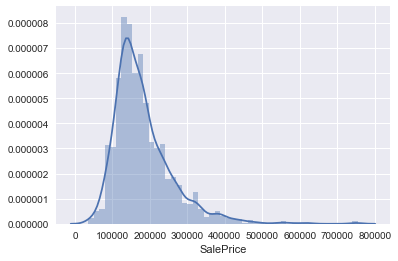

In [312]:
sns.distplot(df_train.SalePrice)
print('skewness: %f' % df_train.SalePrice.skew())
print('kurtosis: %f' % df_train.SalePrice.kurt())

Kurtosis is the tailedness of a probability distribution similar to skewness. A normal dist's kurtosis is 3. Higher values result is fatter tails.
Skew measures the degree of asymmetry of a distribution around its mean.

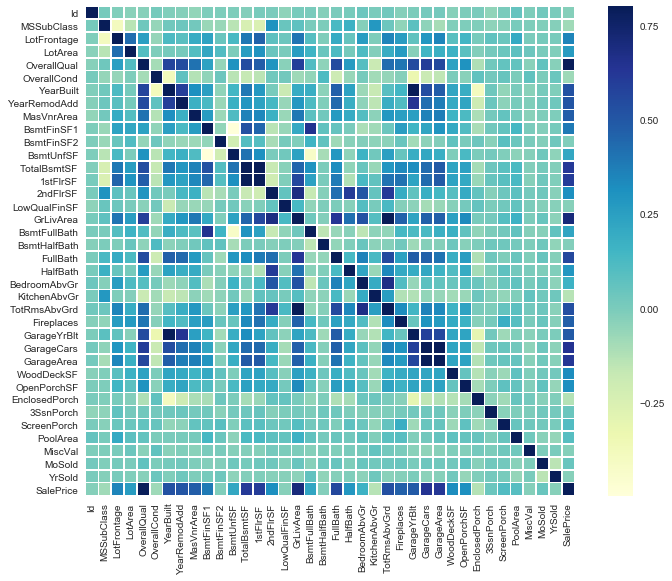

In [313]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, linewidths=.5, cmap="YlGnBu");

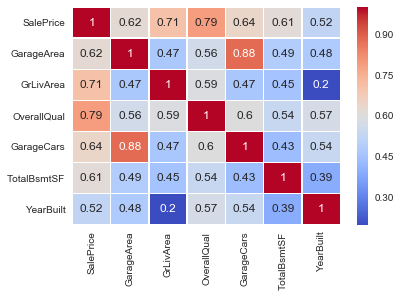

In [314]:
# separate data by category
df_qual = df_train[['OverallQual']]
corrCols = df_train[['SalePrice',
#                'YearRemodAdd','GarageYrBlt', '','Fireplaces', 'TotRmsAbvGrd',
              'GarageArea','GrLivArea', 'OverallQual','GarageCars', 'TotalBsmtSF','YearBuilt',
#               'OverallCond'
             ]]
sns.heatmap(corrCols.corr(), annot = True, cmap = "coolwarm",linewidths=.5)


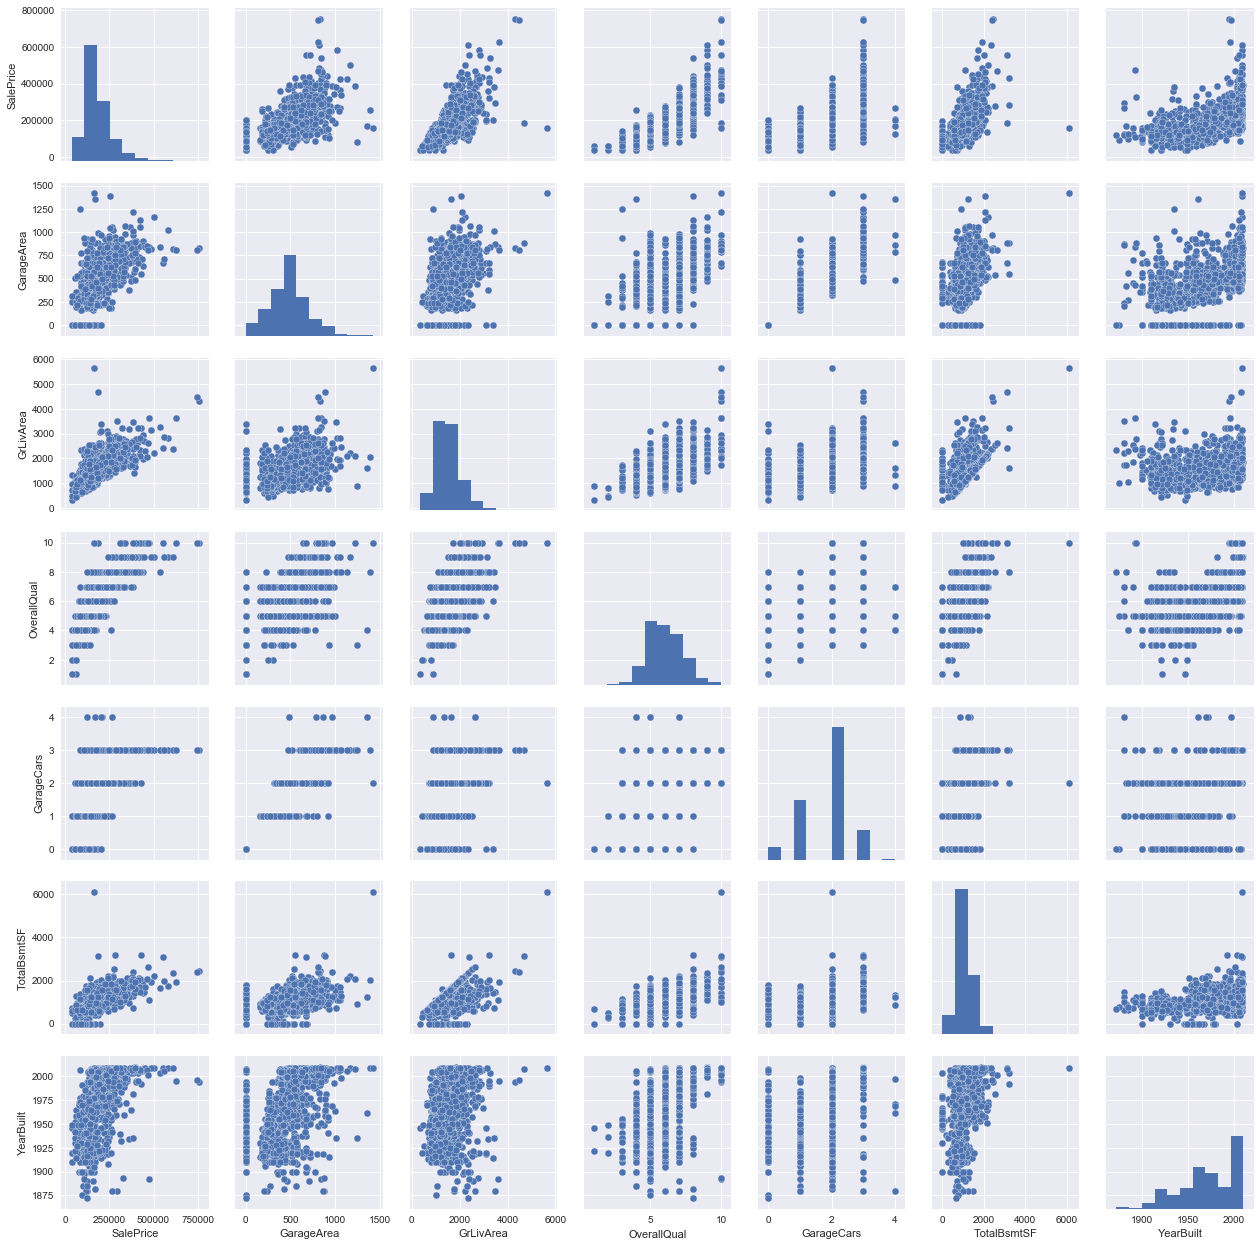

In [315]:
#scatterplot
sns.set()
sns.pairplot(corrCols, size = 2.5)
plt.show();

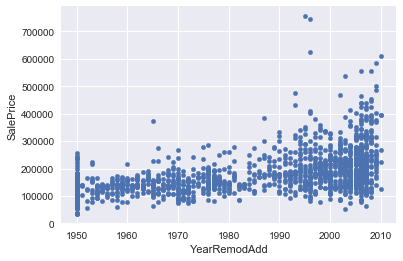

In [316]:
var = 'YearRemodAdd'
dataPlot = pd.concat([df_train.SalePrice, df_train[var]], axis=1)
df_train.plot.scatter(x=var, y='SalePrice')

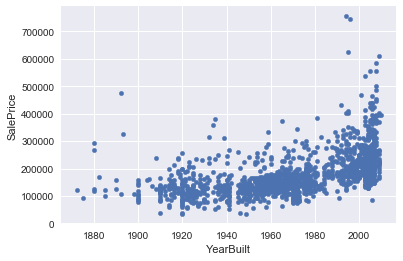

In [317]:
var = 'YearBuilt'
dataPlot = pd.concat([df_train.SalePrice, df_train[var]], axis=1)
df_train.plot.scatter(x=var, y='SalePrice')

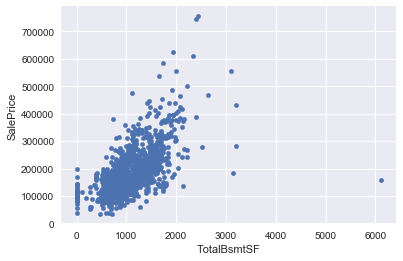

In [318]:
var = 'TotalBsmtSF'
dataPlot = pd.concat([df_train.SalePrice, df_train[var]], axis=1)
df_train.plot.scatter(x=var, y='SalePrice')

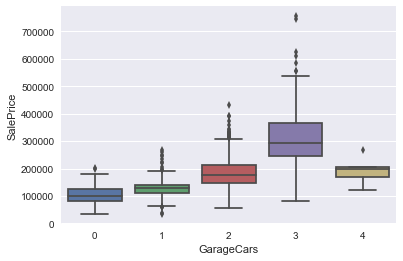

In [319]:
var = 'GarageCars'
dataPlot = pd.concat([df_train.SalePrice, df_train[var]], axis=1)
# df_train.plot.scatter(x=var, y='SalePrice')
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y='SalePrice', data=dataPlot)

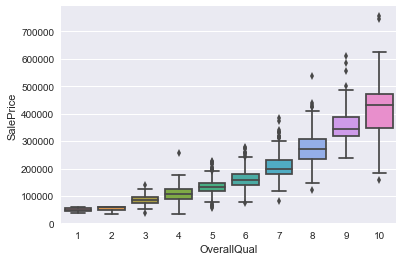

In [320]:
var = 'OverallQual'
dataPlot = pd.concat([df_train.SalePrice, df_train[var]], axis=1)
f, ax = plt.subplots()
fig = sns.boxplot(x=var, y='SalePrice', data= dataPlot)

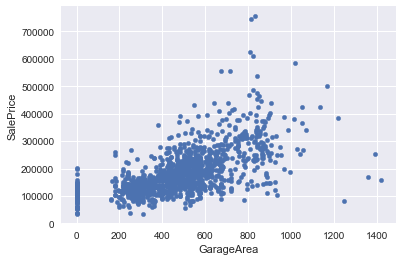

In [321]:
var = 'GarageArea'
dataPlot = pd.concat([df_train.SalePrice, df_train[var]], axis=1)
df_train.plot.scatter(x=var, y='SalePrice')

# Handling the missing data

In [357]:
# clone our dataframe and clean it
cDf_train = df_train.copy(deep=True)

total = cDf_train.isnull().sum().sort_values(ascending=False)
percent = (cDf_train.isnull().sum()/cDf_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


PoolQA, MiscFeature, Alley, and Fence, and even FireplaceQu are missing a lot of values. it's better to just remove that complete completely and not use it in any analysis. The ideal solution would be to find out why that information isn't available and if there's a way we can get it. The data could be lost in the pipeline or in the entry phase. 

In [358]:
cDf_train = cDf_train.drop((missing_data[missing_data['Total'] > 8]).index,1)

# delete our 1 row which has electrical missing
cDf_train = cDf_train.dropna()

# cDf_train = cDf_train.drop(cDf_train.loc[df_train['MasVnrType'].isnull()].index) 

# verify that there are no null values
cDf_train.isnull().sum().max() 

0

# Handle the Outliers

Univariate analysis

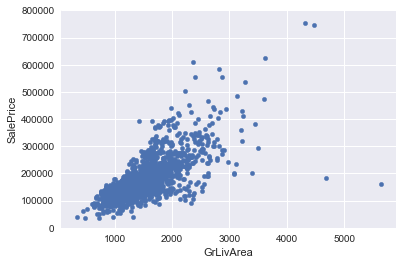

In [362]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([cDf_train['SalePrice'], cDf_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));